In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("laptop_price.csv", encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Cleaning Data-

In [64]:
df.drop(columns='laptop_ID',inplace=True)

In [65]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [66]:
df["Company"] 

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1298    Lenovo
1299    Lenovo
1300    Lenovo
1301        HP
1302      Asus
Name: Company, Length: 1303, dtype: object

In [67]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [68]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [69]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


In [71]:
df['Price_euros'] = df['Price_euros']*81
df.rename({'Price_euros': 'Price'},axis=1,inplace=True)

In [72]:
df['Cpu_Name'] = df['Cpu'].apply(lambda x:x.split()[0])
df['Cpu_model'] = df['Cpu'].apply(lambda x:' '.join(x.split()[1:3]))
df['Cpu_Speed'] = df['Cpu'].apply(lambda x:x.split()[-1])
df['Cpu_Speed'] = df['Cpu_Speed'].str.replace('GHz','')
df.drop(columns='Cpu',inplace=True)
df

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,108514.89,Intel,Core i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,72814.14,Intel,Core i5,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,46575.00,Intel,Core i5,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,205533.45,Intel,Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,146091.60,Intel,Core i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,51678.00,Intel,Core i7,2.5
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,121419.00,Intel,Core i7,2.5
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18549.00,Intel,Celeron Dual,1.6
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,61884.00,Intel,Core i7,2.5


In [73]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,108514.89,Intel,Core i5,2.3,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,72814.14,Intel,Core i5,1.8,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,46575.00,Intel,Core i5,2.5,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,205533.45,Intel,Core i7,2.7,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,146091.60,Intel,Core i5,3.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,51678.00,Intel,Core i7,2.5,1,1
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,121419.00,Intel,Core i7,2.5,1,1
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18549.00,Intel,Celeron Dual,1.6,0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,61884.00,Intel,Core i7,2.5,0,0


In [74]:
df['Resolution'] = df['ScreenResolution'].apply(lambda x:x.split()[-1])
df

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS,Resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,108514.89,Intel,Core i5,2.3,0,1,2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,72814.14,Intel,Core i5,1.8,0,0,1440x900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,46575.00,Intel,Core i5,2.5,0,0,1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,205533.45,Intel,Core i7,2.7,0,1,2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,146091.60,Intel,Core i5,3.1,0,1,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,51678.00,Intel,Core i7,2.5,1,1,1920x1080
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,121419.00,Intel,Core i7,2.5,1,1,3200x1800
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18549.00,Intel,Celeron Dual,1.6,0,0,1366x768
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,61884.00,Intel,Core i7,2.5,0,0,1366x768


In [75]:
df.drop(columns='ScreenResolution',inplace=True)
df

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS,Resolution
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,108514.89,Intel,Core i5,2.3,0,1,2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,72814.14,Intel,Core i5,1.8,0,0,1440x900
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,46575.00,Intel,Core i5,2.5,0,0,1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,205533.45,Intel,Core i7,2.7,0,1,2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,146091.60,Intel,Core i5,3.1,0,1,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,51678.00,Intel,Core i7,2.5,1,1,1920x1080
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,121419.00,Intel,Core i7,2.5,1,1,3200x1800
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18549.00,Intel,Celeron Dual,1.6,0,0,1366x768
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,61884.00,Intel,Core i7,2.5,0,0,1366x768


In [76]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df['Gpu_Type'] = df['Gpu'].apply(lambda x:' '.join(x.split()[1:]))
df

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS,Resolution,Gpu_brand,Gpu_Type
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,108514.89,Intel,Core i5,2.3,0,1,2560x1600,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,72814.14,Intel,Core i5,1.8,0,0,1440x900,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,46575.00,Intel,Core i5,2.5,0,0,1920x1080,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,205533.45,Intel,Core i7,2.7,0,1,2880x1800,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,146091.60,Intel,Core i5,3.1,0,1,2560x1600,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,51678.00,Intel,Core i7,2.5,1,1,1920x1080,Intel,HD Graphics 520
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,121419.00,Intel,Core i7,2.5,1,1,3200x1800,Intel,HD Graphics 520
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18549.00,Intel,Celeron Dual,1.6,0,0,1366x768,Intel,HD Graphics
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,61884.00,Intel,Core i7,2.5,0,0,1366x768,AMD,Radeon R5 M330


In [77]:
df.drop(columns='Gpu',inplace=True)

In [78]:
df

,Company,Product,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS,Resolution,Gpu_brand,Gpu_Type
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,macOS,1.37,108514.89,Intel,Core i5,2.3,0,1,2560x1600,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34,72814.14,Intel,Core i5,1.8,0,0,1440x900,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,256GB SSD,No OS,1.86,46575.00,Intel,Core i5,2.5,0,0,1920x1080,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,macOS,1.83,205533.45,Intel,Core i7,2.7,0,1,2880x1800,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,macOS,1.37,146091.60,Intel,Core i5,3.1,0,1,2560x1600,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128GB SSD,Windows 10,1.80,51678.00,Intel,Core i7,2.5,1,1,1920x1080,Intel,HD Graphics 520
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512GB SSD,Windows 10,1.30,121419.00,Intel,Core i7,2.5,1,1,3200x1800,Intel,HD Graphics 520
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64GB Flash Storage,Windows 10,1.50,18549.00,Intel,Celeron Dual,1.6,0,0,1366x768,Intel,HD Graphics
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,1TB HDD,Windows 10,2.19,61884.00,Intel,Core i7,2.5,0,0,1366x768,AMD,Radeon R5 M330


In [79]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [80]:
df['os'] = df['OpSys'].apply(cat_os)

In [81]:
df.drop(columns='OpSys',inplace=True)
df

,Company,Product,TypeName,Inches,Ram,Memory,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS,Resolution,Gpu_brand,Gpu_Type,os
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,1.37,108514.89,Intel,Core i5,2.3,0,1,2560x1600,Intel,Iris Plus Graphics 640,Mac
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,1.34,72814.14,Intel,Core i5,1.8,0,0,1440x900,Intel,HD Graphics 6000,Mac
2,HP,250 G6,Notebook,15.6,8,256GB SSD,1.86,46575.00,Intel,Core i5,2.5,0,0,1920x1080,Intel,HD Graphics 620,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,1.83,205533.45,Intel,Core i7,2.7,0,1,2880x1800,AMD,Radeon Pro 455,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,1.37,146091.60,Intel,Core i5,3.1,0,1,2560x1600,Intel,Iris Plus Graphics 650,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128GB SSD,1.80,51678.00,Intel,Core i7,2.5,1,1,1920x1080,Intel,HD Graphics 520,Windows
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512GB SSD,1.30,121419.00,Intel,Core i7,2.5,1,1,3200x1800,Intel,HD Graphics 520,Windows
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64GB Flash Storage,1.50,18549.00,Intel,Celeron Dual,1.6,0,0,1366x768,Intel,HD Graphics,Windows
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,1TB HDD,2.19,61884.00,Intel,Core i7,2.5,0,0,1366x768,AMD,Radeon R5 M330,Windows


In [82]:
df['Product'] = df['Product'].str.split("(").apply(lambda x:x[0])

In [83]:
df['Memory'].unique()
df

,Company,Product,TypeName,Inches,Ram,Memory,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS,Resolution,Gpu_brand,Gpu_Type,os
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,1.37,108514.89,Intel,Core i5,2.3,0,1,2560x1600,Intel,Iris Plus Graphics 640,Mac
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,1.34,72814.14,Intel,Core i5,1.8,0,0,1440x900,Intel,HD Graphics 6000,Mac
2,HP,250 G6,Notebook,15.6,8,256GB SSD,1.86,46575.00,Intel,Core i5,2.5,0,0,1920x1080,Intel,HD Graphics 620,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,1.83,205533.45,Intel,Core i7,2.7,0,1,2880x1800,AMD,Radeon Pro 455,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,1.37,146091.60,Intel,Core i5,3.1,0,1,2560x1600,Intel,Iris Plus Graphics 650,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128GB SSD,1.80,51678.00,Intel,Core i7,2.5,1,1,1920x1080,Intel,HD Graphics 520,Windows
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512GB SSD,1.30,121419.00,Intel,Core i7,2.5,1,1,3200x1800,Intel,HD Graphics 520,Windows
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64GB Flash Storage,1.50,18549.00,Intel,Celeron Dual,1.6,0,0,1366x768,Intel,HD Graphics,Windows
1301,HP,15-AC110nv,Notebook,15.6,6,1TB HDD,2.19,61884.00,Intel,Core i7,2.5,0,0,1366x768,AMD,Radeon R5 M330,Windows


In [84]:
dfm = df['Memory'].str.split(' ',1,expand=True)
df['Memory_Storage'] = dfm[1]
df['Memory'] = dfm[0]
df

,Company,Product,TypeName,Inches,Ram,Memory,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS,Resolution,Gpu_brand,Gpu_Type,os,Memory_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB,1.37,108514.89,Intel,Core i5,2.3,0,1,2560x1600,Intel,Iris Plus Graphics 640,Mac,SSD
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB,1.34,72814.14,Intel,Core i5,1.8,0,0,1440x900,Intel,HD Graphics 6000,Mac,Flash Storage
2,HP,250 G6,Notebook,15.6,8,256GB,1.86,46575.00,Intel,Core i5,2.5,0,0,1920x1080,Intel,HD Graphics 620,Others/No OS/Linux,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB,1.83,205533.45,Intel,Core i7,2.7,0,1,2880x1800,AMD,Radeon Pro 455,Mac,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB,1.37,146091.60,Intel,Core i5,3.1,0,1,2560x1600,Intel,Iris Plus Graphics 650,Mac,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128GB,1.80,51678.00,Intel,Core i7,2.5,1,1,1920x1080,Intel,HD Graphics 520,Windows,SSD
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512GB,1.30,121419.00,Intel,Core i7,2.5,1,1,3200x1800,Intel,HD Graphics 520,Windows,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64GB,1.50,18549.00,Intel,Celeron Dual,1.6,0,0,1366x768,Intel,HD Graphics,Windows,Flash Storage
1301,HP,15-AC110nv,Notebook,15.6,6,1TB,2.19,61884.00,Intel,Core i7,2.5,0,0,1366x768,AMD,Radeon R5 M330,Windows,HDD


In [85]:
df['Memory'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [86]:
df_mem = df['Memory'].str.split('(\d+)',expand=True)
df['Memory'] = pd.to_numeric(df_mem[1])

df['Memory'] = df['Memory'].apply(lambda x:1024 if x == 1 else x)
df['Memory'] = df['Memory'].apply(lambda x:2048 if x == 2 else x)
df

,Company,Product,TypeName,Inches,Ram,Memory,Weight,Price,Cpu_Name,Cpu_model,Cpu_Speed,Touchscreen,IPS,Resolution,Gpu_brand,Gpu_Type,os,Memory_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,1.37,108514.89,Intel,Core i5,2.3,0,1,2560x1600,Intel,Iris Plus Graphics 640,Mac,SSD
1,Apple,Macbook Air,Ultrabook,13.3,8,128,1.34,72814.14,Intel,Core i5,1.8,0,0,1440x900,Intel,HD Graphics 6000,Mac,Flash Storage
2,HP,250 G6,Notebook,15.6,8,256,1.86,46575.00,Intel,Core i5,2.5,0,0,1920x1080,Intel,HD Graphics 620,Others/No OS/Linux,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,1.83,205533.45,Intel,Core i7,2.7,0,1,2880x1800,AMD,Radeon Pro 455,Mac,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,1.37,146091.60,Intel,Core i5,3.1,0,1,2560x1600,Intel,Iris Plus Graphics 650,Mac,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128,1.80,51678.00,Intel,Core i7,2.5,1,1,1920x1080,Intel,HD Graphics 520,Windows,SSD
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512,1.30,121419.00,Intel,Core i7,2.5,1,1,3200x1800,Intel,HD Graphics 520,Windows,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64,1.50,18549.00,Intel,Celeron Dual,1.6,0,0,1366x768,Intel,HD Graphics,Windows,Flash Storage
1301,HP,15-AC110nv,Notebook,15.6,6,1024,2.19,61884.00,Intel,Core i7,2.5,0,0,1366x768,AMD,Radeon R5 M330,Windows,HDD


In [87]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'Memory', 'Weight',
       'Price', 'Cpu_Name', 'Cpu_model', 'Cpu_Speed', 'Touchscreen', 'IPS',
       'Resolution', 'Gpu_brand', 'Gpu_Type', 'os', 'Memory_Storage'],
      dtype='object')

In [88]:
df = df.reindex(columns=['Company', 'TypeName', 'Inches', 'Touchscreen', 'IPS','Cpu_Name', 'Cpu_model', 'Ram', 'Memory', 'Memory_Storage', 'Gpu_brand', 'Gpu_Type',
                        'Weight','os', 'Price'])

In [89]:
df.rename({'Memory_Storage': 'Memory_Type'},axis=1,inplace=True)

In [90]:
df.head()

,Company,TypeName,Inches,Touchscreen,IPS,Cpu_Name,Cpu_model,Ram,Memory,Memory_Type,Gpu_brand,Gpu_Type,Weight,os,Price
0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,Iris Plus Graphics 640,1.37,Mac,108514.89
1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,72814.14
2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.86,Others/No OS/Linux,46575.00
3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,Radeon Pro 455,1.83,Mac,205533.45
4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,Iris Plus Graphics 650,1.37,Mac,146091.60


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Touchscreen  1303 non-null   int64  
 4   IPS          1303 non-null   int64  
 5   Cpu_Name     1303 non-null   object 
 6   Cpu_model    1303 non-null   object 
 7   Ram          1303 non-null   int32  
 8   Memory       1303 non-null   int64  
 9   Memory_Type  1303 non-null   object 
 10  Gpu_brand    1303 non-null   object 
 11  Gpu_Type     1303 non-null   object 
 12  Weight       1303 non-null   float32
 13  os           1303 non-null   object 
 14  Price        1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(3), object(8)
memory usage: 142.6+ KB


In [92]:
backup = df.to_csv("New_Price_Data.csv")

In [93]:
import seaborn as sns

In [94]:
sns.set(rc = {'figure.figsize':(10,5)})

<AxesSubplot:xlabel='Price', ylabel='Count'>

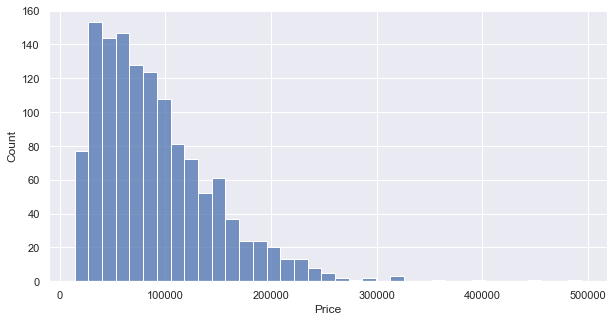

In [95]:
sns.histplot(df['Price'])

### Comparing Price with column-

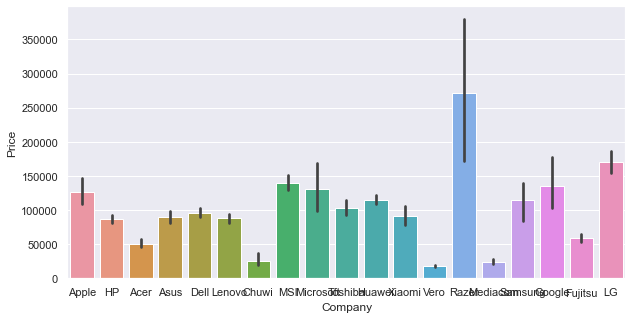

In [96]:
sns.barplot(x='Company',y="Price",data=df)
plt.show()

## Data Analysis

<AxesSubplot:>

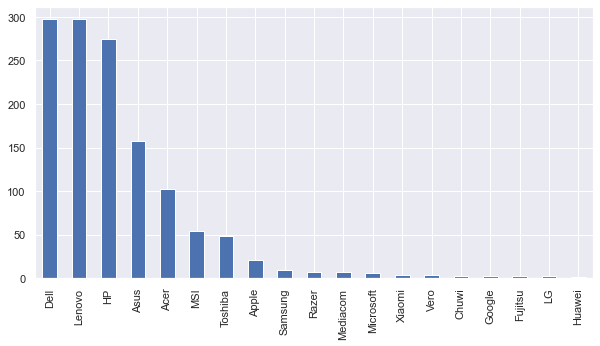

In [97]:
df["Company"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Company', ylabel='Price'>

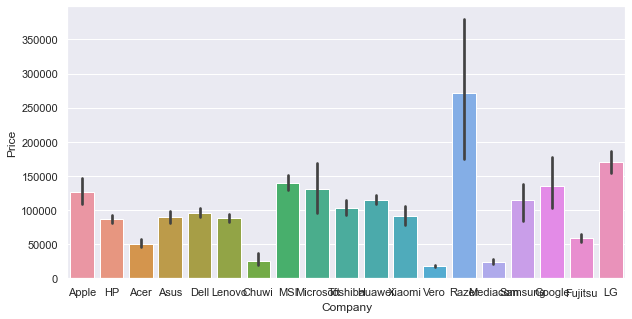

In [98]:
sns.barplot(x=df["Company"], y=df["Price"])

In [99]:
cpu_distribution = df["Cpu_model"].value_counts()[:10].reset_index()
cpu_distribution

,index,Cpu_model
0,Core i7,527
1,Core i5,423
2,Core i3,136
3,Celeron Dual,80
4,Pentium Quad,27
5,Core M,19
6,A9-Series 9420,12
7,Celeron Quad,8
8,A6-Series 9220,8
9,A12-Series 9720P,7


## Prediction


In [100]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [101]:
X.nunique()

Company         19
TypeName         6
Inches          18
Touchscreen      2
IPS              2
Cpu_Name         3
Cpu_model       40
Ram              9
Memory          13
Memory_Type     12
Gpu_brand        4
Gpu_Type       106
Weight         171
os               3
dtype: int64

In [102]:
X['Gpu_Type'].unique()

array(['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',
       'Radeon Pro 455', 'Iris Plus Graphics 650', 'Radeon R5',
       'Iris Pro Graphics', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon Pro 555', 'Radeon R5 M430',
       'HD Graphics 615', 'Radeon Pro 560', 'GeForce 940MX',
       'HD Graphics 400', 'GeForce GTX 1050', 'Radeon R2', 'Radeon 530',
       'GeForce 930MX', 'HD Graphics', 'HD Graphics 500',
       'GeForce GTX 1060', 'GeForce 150MX', 'Iris Graphics 540',
       'Radeon RX 580', 'GeForce 920MX', 'Radeon R4 Graphics',
       'Radeon 520', 'GeForce GTX 1070', 'GeForce GTX 1050 Ti',
       'GeForce MX130', 'R4 Graphics', 'GeForce GTX 940MX',
       'Radeon RX 560', 'GeForce 920M', 'Radeon R7 M445', 'Radeon RX 550',
       'GeForce GTX 1050M', 'HD Graphics 515', 'Radeon R5 M420',
       'HD Graphics 505', 'GTX 980 SLI', 'R17M-M1-70', 'GeForce GTX 1080',
       'Quadro M1200', 'GeForce GTX 950M', 'FirePro W4190M',
       'GeForce G

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [105]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,5,6,9,10,11,13])],
                          remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8975659517973994
MAE 0.15145038275834488


c:\Users\Ayush Srivastava\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [106]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [107]:
ipe = pickle.load(open("pipe.pkl", "rb"))

In [112]:
q=np.array(['hp','Notebook',13.3,0,1,'Intel','Core i7',8,500,'sdd','Intel','UHD Graphics 620',1.49,'Window'])

In [113]:
q=q.reshape(1,14)

In [114]:
p = str(int(np.exp(ipe.predict(q)[0])))

c:\Users\Ayush Srivastava\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Ayush Srivastava\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [115]:
p

'81173'